# Chapter 6 - Visualising Naive Bayes

## Setup

<b>Note:</b> These visualizations were inspired by a blog post by Drazen Zaric about using heatmaps with different sized cells, which can be found at https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec . The code in the blog post was particularly helpful for understanding how to correctly format the background grid to improve the presentation of the plots. 

Run Python file to import libraries and custom functions

In [1]:
%run libraries.py

/Users/joefarrington/anaconda3/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/Users/joefarrington/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


Set paths for importing data and saving results

In [5]:
results_path = '/Users/joefarrington/Documents/MSc Machine Learning/Project/August/Results/Ch6plotNB/'

In [6]:
plot_path = '/Users/joefarrington/Documents/MSc Machine Learning/Project/August/Plots/Ch6/'

Create a list of all the ADI-R behavioural items

In [7]:
behavs = ['adi_50m', 'adi_51m', 'adi_57m', 'adi_49m', 'adi_62m', 'adi_63m', 'Item64_65',
       'adi_52m', 'adi_53m', 'adi_54m', 'adi_31e', 'adi_55m', 'adi_56m',
       'adi_58e', 'adi_59m', 'adi_42m', 'adi_43m', 'adi_44m', 'adi_45m',
       'adi_47m', 'adi_48m', 'adi_61m', 'adi_34e', 'adi_35e', 'adi_33e',
       'adi_36e', 'adi_37e', 'adi_38e', 'adi_67e', 'adi_68e', 'adi_39e',
       'adi_70e', 'Item77_78', 'Item69_71']

Create a list of the labels to use in the plots

In [8]:
x_labs = ['50', '51', '57', '49', '62', '63', '64/65', '52', '53', '54', '31', '55', '56','58', '59', '42', 
          '43', '44', '45', '47', '48', '61', '34', '35', '33', '36', '37', '38', '67', '68',
          '39', '70', '77/78', '69/71']

## Plot the conditional likelihoods for the Bruining syndromic dataset

Create a dataframe to store the probabilities

In [94]:
df_B_weights = pd.DataFrame(columns = ["Syndrome", "Behaviour", "Score", "Prob"])

For each combination of behaviour and score, check if the maximum conditional likelihood is tied. If it is, print out the results. If not, just add the score corresponding to the maximum conditional likelihood to the dataframe.

In [95]:
count = 0
idx = 0
for b in behavs:
    
    print(f'-----{b}-----')
    
    nboutput = pd.read_csv(results_path+f'/Bruining_NB_viz{b}.csv', index_col=0)
    
    #Print out any duplicates if the sum of the duplicates is greater than 2/3
    for synd in nboutput.columns:
        if np.sum(nboutput[synd][nboutput[synd].duplicated(keep=False)])>=(2/3):
            print(nboutput[synd])
            count+=1
    
    #Where there is no tie, add the details to a dataframe
        else:
            newrow = pd.DataFrame({"Syndrome":synd, "Behaviour": b,
                         "Score":np.argmax(np.array(nboutput[synd]), axis=0), "Prob":np.array(np.max(nboutput[synd], axis=0)), "Tie": "N"}, index=[idx]) 
            
            df_B_weights = df_B_weights.append(newrow)
            idx +=1

-----adi_50m-----
-----adi_51m-----
-----adi_57m-----
-----adi_49m-----
-----adi_62m-----
-----adi_63m-----
0.0    0.407407
1.0    0.407407
2.0    0.185185
Name: Down, dtype: float64
-----Item64_65-----
0.0    0.404255
1.0    0.404255
2.0    0.191489
Name: PW, dtype: float64
-----adi_52m-----
0.0    0.142857
1.0    0.428571
2.0    0.428571
Name: SMC15, dtype: float64
-----adi_53m-----
-----adi_54m-----
-----adi_31e-----
-----adi_55m-----
-----adi_56m-----
0.0    0.370370
1.0    0.370370
2.0    0.259259
Name: Down, dtype: float64
-----adi_58e-----
-----adi_59m-----
0.0    0.444444
1.0    0.111111
2.0    0.444444
Name: Down, dtype: float64
-----adi_42m-----
-----adi_43m-----
-----adi_44m-----
-----adi_45m-----
0.0    0.464286
1.0    0.071429
2.0    0.464286
Name: SMC15, dtype: float64
-----adi_47m-----
-----adi_48m-----
-----adi_61m-----
-----adi_34e-----
-----adi_35e-----
0.0    0.392857
1.0    0.392857
2.0    0.214286
Name: TSC, dtype: float64
-----adi_33e-----
-----adi_36e-----
-----a

Add lines to the dataframe manually to account for the ties. The 'score' is the mean of the scores with the same probability. 

In [96]:
tie_synd = ["Down", "PW", "SMC15", "Down", "Down", "SMC15", "TSC", "SMC15" ]
tie_behav = ["adi_63m", "Item64_65", "adi_52m", "adi_56m", "adi_59m", "adi_45m", "adi_35e", "Item77_78"]
tie_score = [0.5, 0.5, 1.5, 0.5, 1, 1, 0.5, 1.5]
tie_prob = [0.407407, 0.404255, 0.428571,0.370370, 0.444444, 0.464286, 0.392857, 0.357143]
tie_tie = ["Y", "Y", "Y", "Y", "Y", "Y", "Y", "Y"]

tie_rows = pd.DataFrame({"Syndrome":tie_synd, "Behaviour": tie_behav,
                         "Score":tie_score, "Prob":tie_prob, "Tie": tie_tie}) 
            
df_B_weights = df_B_weights.append(tie_rows)

Convert the scores to floats so that they can be used by Seaborn to set the size of the markers

In [98]:
df_B_weights.loc[:,'Score'] = df_B_weights.Score.astype(np.float)

Create the plot and save it

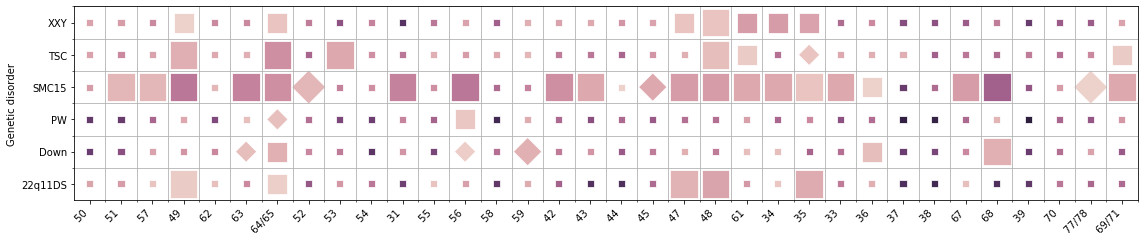

In [105]:
fig, ax = plt.subplots(figsize=(16,3.5))

ax = sns.scatterplot(x='Behaviour', y='Syndrome',
                     hue='Prob', size='Score', sizes=(50, 750),
                     data=df_B_weights, style = 'Tie', markers=['s', 'D'], legend=False)

plt.xticks(rotation=45, ha='right');

ax.grid(False, 'major')
ax.grid(True, 'minor')
ax.set_xticks([t + 0.5 for t in ax.get_xticks()], minor=True)
ax.set_yticks([t + 0.5 for t in ax.get_yticks()], minor=True)
ax.set_xticklabels(labels = x_labs, rotation = 45, minor=False)
ax.set_ylabel('Genetic disorder')
ax.set_xlabel('')
ax.set_xlim([-0.5, max([v for v in range(0,34)]) + 0.5]) 
ax.set_ylim([-0.5, max([v for v in range(0,6)]) + 0.5])
plt.tight_layout()
plt.savefig(plot_path+'NBvis_B_ties')

## Plot the conditional likelihoods for the full syndromic dataset

Create a dataframe to store the probabilities

In [106]:
df_Rev_weights = pd.DataFrame(columns = ["Syndrome", "Behaviour", "Score", "Prob"])

For each combination of behaviour and score, check if the maximum conditional likelihood is tied. If it is, print out the results. If not, just add the score corresponding to the maximum conditional likelihood to the dataframe.

In [108]:
count = 0
idx = 0

for b in behavs:
    
    print(f'-----{b}-----')
    
    nboutput = pd.read_csv(results_path+f'/Rev_NB_viz{b}.csv', index_col=0)
    
    #Print out any duplicates if the sum of the duplicates is greater than 2/3
    for synd in nboutput.columns:
        if np.sum(nboutput[synd][nboutput[synd].duplicated(keep=False)])>=(2/3):
            print(nboutput[synd])
            count+=1
    #Where there is no tie, add the details to a dataframe
        else:
            newrows = pd.DataFrame({"Syndrome":synd, "Behaviour":b,
                         "Score":np.argmax(np.array(nboutput[synd]), axis=0), "Prob":np.array(np.max(nboutput[synd], axis=0)), "Tie": "N"}, index=[idx]) 
    
            df_Rev_weights = df_Rev_weights.append(newrows, ignore_index=True)
            idx+=1

-----adi_50m-----
-----adi_51m-----
-----adi_57m-----
-----adi_49m-----
-----adi_62m-----
-----adi_63m-----
-----Item64_65-----
-----adi_52m-----
-----adi_53m-----
-----adi_54m-----
-----adi_31e-----
-----adi_55m-----
0.0    0.333333
1.0    0.333333
2.0    0.333333
Name: NF1, dtype: float64
-----adi_56m-----
-----adi_58e-----
-----adi_59m-----
-----adi_42m-----
-----adi_43m-----
-----adi_44m-----
0.0    0.368421
1.0    0.263158
2.0    0.368421
Name: SMC15, dtype: float64
-----adi_45m-----
-----adi_47m-----
-----adi_48m-----
-----adi_61m-----
-----adi_34e-----
-----adi_35e-----
0.0    0.368421
1.0    0.368421
2.0    0.263158
Name: SMC15, dtype: float64
-----adi_33e-----
-----adi_36e-----
0.0    0.215686
1.0    0.392157
2.0    0.392157
Name: NF1, dtype: float64
-----adi_37e-----
-----adi_38e-----
-----adi_67e-----
-----adi_68e-----
0.0    0.366667
1.0    0.266667
2.0    0.366667
Name: Down, dtype: float64
-----adi_39e-----
-----adi_70e-----
-----Item77_78-----
-----Item69_71-----


Add lines to the dataframe manually to account for the ties. The 'score' is the mean of the scores with the same probability.

In [109]:
tie_synd = ["NF1", "SMC15", "SMC15", "NF1", "Down"]
tie_behav = ["adi_55m", "adi_44m", "adi_35e", "adi_36e", "adi_68e"]
tie_score = [1, 1, 0.5, 1.5, 1]
tie_prob = [0.333333, 0.368421, 0.368421, 0.392157, 0.366667]
tie_tie = ["Y", "Y", "Y", "Y", "Y"]

tie_rows = pd.DataFrame({"Syndrome":tie_synd, "Behaviour": tie_behav,
                         "Score":tie_score, "Prob":tie_prob, "Tie": tie_tie}) 
            
df_Rev_weights = df_Rev_weights.append(tie_rows)

Convert the scores to floats so that they can be used by Seaborn to set the size of the markers

In [110]:
df_Rev_weights.loc[:,'Score'] = df_Rev_weights.Score.astype(np.float)

Creat the plot and save it

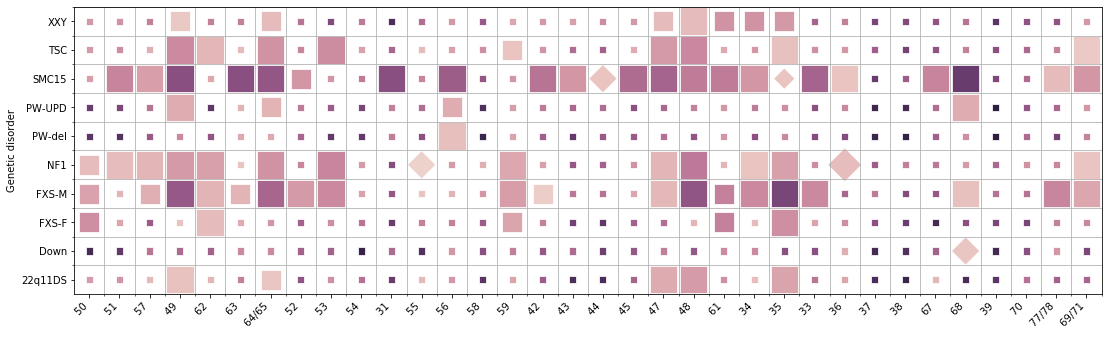

In [111]:
fig, ax = plt.subplots(figsize=(15.5,4.8))
ax = sns.scatterplot(x='Behaviour', y='Syndrome',
                     hue='Prob', size='Score', sizes=(50, 750),
                     data=df_Rev_weights, style = 'Tie', markers=['s', 'D'], legend=False)
plt.xticks(rotation=45, ha='right');

ax.grid(False, 'major')
ax.grid(True, 'minor')
ax.set_xticks([t + 0.5 for t in ax.get_xticks()], minor=True)
ax.set_yticks([t + 0.5 for t in ax.get_yticks()], minor=True)
ax.set_xticklabels(labels = x_labs, rotation = 45, minor=False)
ax.set_xlabel('')
ax.set_ylabel('Genetic disorder')

ax.set_xlim([-0.5, max([v for v in range(0,34)]) + 0.5]) 
ax.set_ylim([-0.5, max([v for v in range(0,10)]) + 0.5])
plt.tight_layout()
plt.savefig(plot_path+'NBvis_Rev_ties')